In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
# Statistical analysis
from scipy import stats
from numpy import mean

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# reflect the tables
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect = True)

# View all of the classes that automap found
Base.classes.keys()

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [5]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [6]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.asc()).all()[-1][0]
#recent_date = session.query(Measurement.date).order_by(Measurement.date.asc()).all()
print(f"The most recent date in the data set is {recent_date}.\n")

The most recent date in the data set is 2017-08-23.



In [7]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
twelve_months_precipitation = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > (dt.datetime.strptime(recent_date,"%Y-%m-%d")-dt.timedelta(days=365))).all()
twelve_months_precipitation

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [8]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
prcp_df = pd.DataFrame(twelve_months_precipitation,columns=["Date","Precipitation"]).sort_values("Date",ascending=False).set_index("Date").dropna()
prcp_df.head()

,Precipitation
Date,
2017-08-23,0.45
2017-08-23,0.08
2017-08-23,0.00
2017-08-23,0.00
2017-08-22,0.00


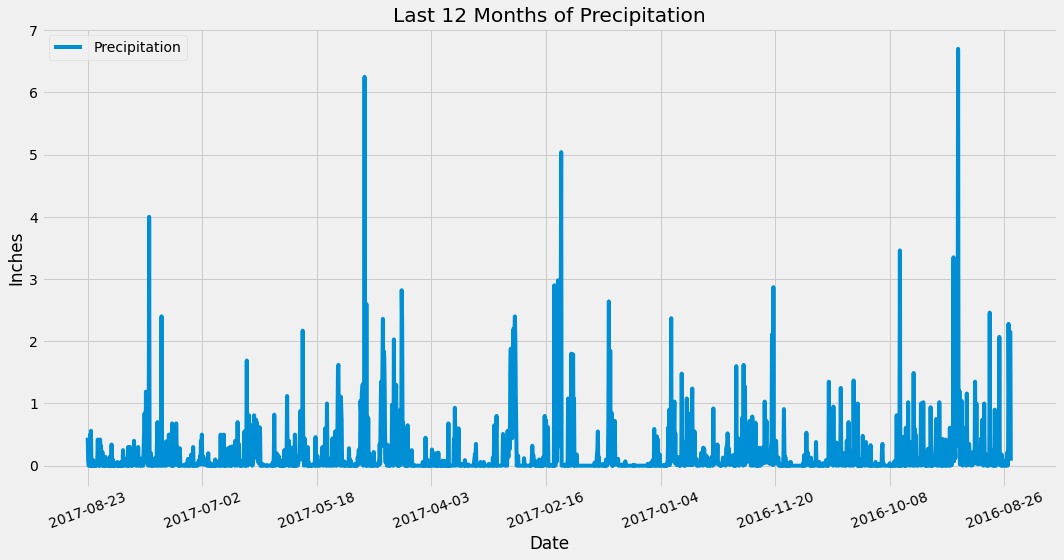

In [9]:
# Use Pandas Plotting with Matplotlib to plot the data
myplot=prcp_df.plot.line(rot=20,figsize=(15,8))
myplot.set_ylabel("Inches")
myplot.set_title("Last 12 Months of Precipitation")
plt.tight_layout()
plt.savefig("Last_12_Months_of_Precipitation.png")
plt.show()

In [10]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_summary_df=prcp_df.describe()['Precipitation'].round(2).reset_index().rename(columns={"index":"Summary Statistics"}).set_index("Summary Statistics")
prcp_summary_df

,Precipitation
Summary Statistics,
count,2015.00
mean,0.18
std,0.46
min,0.00
25%,0.00
50%,0.02
75%,0.13
max,6.70


# Exploratory Station Analysis

In [11]:
# Design a query to calculate the total number stations in the dataset
num_stations = session.query(Measurement.station).distinct(Measurement.station).count()
#list(np.ravel(num_stations))

print(f"The total number of stations is {num_stations}.\n")

The total number of stations is 9.



In [12]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_stations=session.query(func.count(Measurement.station), Measurement.station).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc())
print(f"(station points of data count, station id): {most_active_stations.all()}\n")
mas=most_active_stations.first()[1]
print(f"Most active weather station is {mas}.\n")

(station points of data count, station id): [(2772, 'USC00519281'), (2724, 'USC00519397'), (2709, 'USC00513117'), (2669, 'USC00519523'), (2612, 'USC00516128'), (2202, 'USC00514830'), (1979, 'USC00511918'), (1372, 'USC00517948'), (511, 'USC00518838')]

Most active weather station is USC00519281.



In [13]:
print(f"The most active weather station is {mas} with {most_active_stations.first()[0]} points of data.")

The most active weather station is USC00519281 with 2772 points of data.


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp= session.query(func.min(Measurement.tobs)).filter(Measurement.station == mas)[0]
print(f"The lowest temperature for the most active weather station, {mas}, is {lowest_temp[0]} degrees F.")
highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == mas)[0]
print(f"The highest temperature for the most active weather station, {mas}, is {highest_temp[0]} degrees F.")

The lowest temperature for the most active weather station, USC00519281, is 54.0 degrees F.
The highest temperature for the most active weather station, USC00519281, is 85.0 degrees F.


In [15]:
all_temps=session.query(Measurement.tobs).filter(Measurement.station==mas)
all_real_temps=[]
for temp in all_temps:
    if type(temp[0]) == float:
        all_real_temps.append(temp[0])

In [16]:
avg_temp = round(mean(all_real_temps),2)
print(f"The average temperature for the most active weather station, {mas}, is {avg_temp} degrees F.")

The average temperature for the most active weather station, USC00519281, is 71.66 degrees F.


In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
twelve_months_temperatures = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date > (dt.datetime.strptime(recent_date,"%Y-%m-%d")-dt.timedelta(days=365))).\
    filter(Measurement.station==mas).all()
temps_df = pd.DataFrame(twelve_months_temperatures,columns=["Date","Temperatures"]).sort_values("Date",ascending=False).set_index("Date").dropna()
temps_df.head()

,Temperatures
Date,
2017-08-18,79.0
2017-08-17,76.0
2017-08-16,76.0
2017-08-15,77.0
2017-08-14,77.0


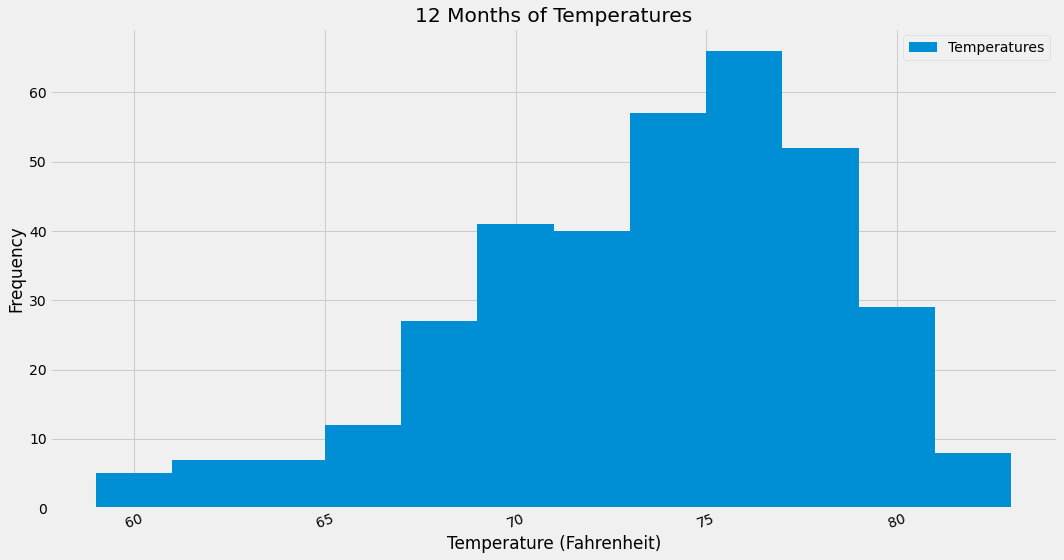

In [18]:
thist=temps_df.plot.hist(rot=20,figsize=(15,8),bins=12) #"12 Months of Temperatures"
thist.set_title("12 Months of Temperatures")
thist.set_xlabel("Temperature (Fahrenheit)")
plt.tight_layout()
plt.savefig("Last_12_Months_of_Temperatures.png")
plt.show()

In [21]:
#start="2012-02-23"
#TMIN, TAVG, TMAX = session.query(func.min(Measurement.tobs),func.avg(Measurement.tobs),func.max(Measurement.tobs)).all()[0]
#print(TMIN, TAVG, TMAX)
#session = Session(engine)
    
#recent_date = session.query(Measurement.date).order_by(Measurement.date.asc()).all()[-1][0]

#most_active_12 = session.query(Measurement.station).\
 #   filter(Measurement.date>(dt.datetime.strptime(recent_date,"%Y-%m-%d")-dt.timedelta(days=365))).\
  #      group_by(Measurement.station).\
   #     order_by(func.count(Measurement.station).desc()).first()[0]

#most_active_tobs = session.query(Measurement.tobs,Measurement.date,Measurement.station).\
 #   filter(Measurement.station == most_active_12).filter(Measurement.date>(dt.datetime.strptime(recent_date,"%Y-%m-%d")-dt.timedelta(days=365))).all()

# Close session

In [20]:
# Close Session
session.close()
engine.dispose()